# Practical 2
In this exercise, you will learn how to select the hyperparameter in SVM.
You will need a library called mlxtrend. You can install using: pip3 install --user mlxtend

In [1]:
## Import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import svm # "Support vector classifier"
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
def plot_svc_decision_function(X, Y, model, xlim = None, ylim = None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    
    if (xlim and ylim) is None:
        xlim = [min(X[:,0]), max(X[:, 0])]
        ylim = [min(X[:,1]), max(X[:, 1])]

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    
    #if more than 2 classes, just plot boundary, otherwise plot margin as well
    if len(model.classes_) > 2:
        Z = model.predict(xy)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    else:
        P = model.decision_function(xy).reshape(xx.shape)
        # plot decision boundary and margins
        plt.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        plt.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black');
        
    for yy in set(Y):
        plt.scatter(X[Y == yy, 0], X[Y == yy, 1], label = "Class " + str(yy))
    
    plt.legend(loc = 'best')
    
    plt.xlim(xlim)
    plt.ylim(ylim)

In [3]:
# First let's see the effect of gamma and C in RBF kernel SVM.

# Generate an artificial data set, with 500 data points and 2 classes.

X, y = make_blobs(n_samples=200, centers=2, random_state=2, cluster_std=0.45)

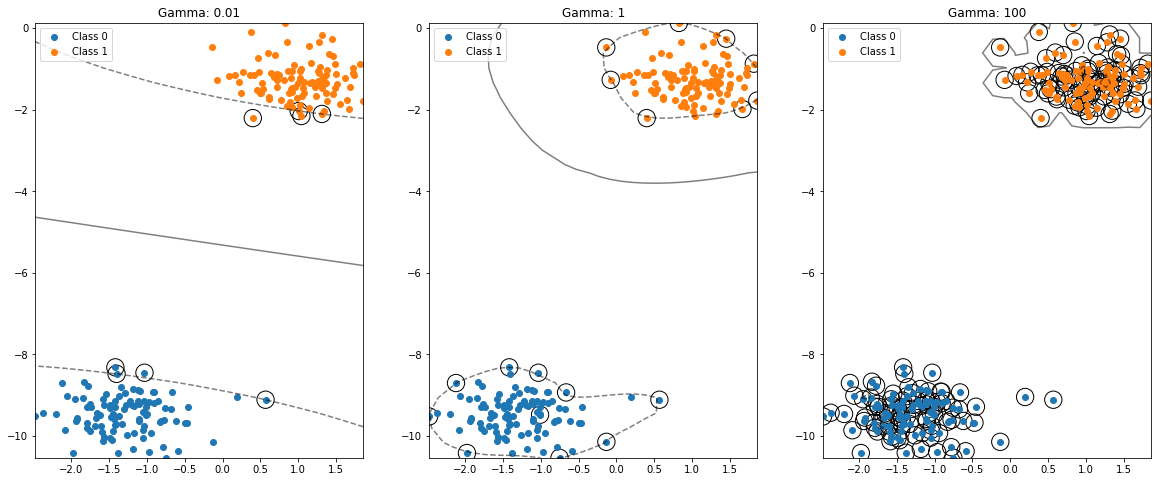

In [4]:
#Create RBF SVM model as what we have done in exercise 1, however, use gamme= [10^-2, 10^0, 10^2]
gammas = [-2,0,2]
counter = 0
plt.rcParams["figure.figsize"] = (20,8)
for gamma in gammas:
    counter = counter + 1
    model = svm.SVC(kernel = 'rbf', gamma=pow(10,gamma))
    model.fit(X, y)
    plt.subplot(1, len(gammas),counter)
    plot_svc_decision_function(X, y, model)
    plt.title("Gamma: " + str(pow(10,gamma)))
plt.rcParams.update(plt.rcParamsDefault)

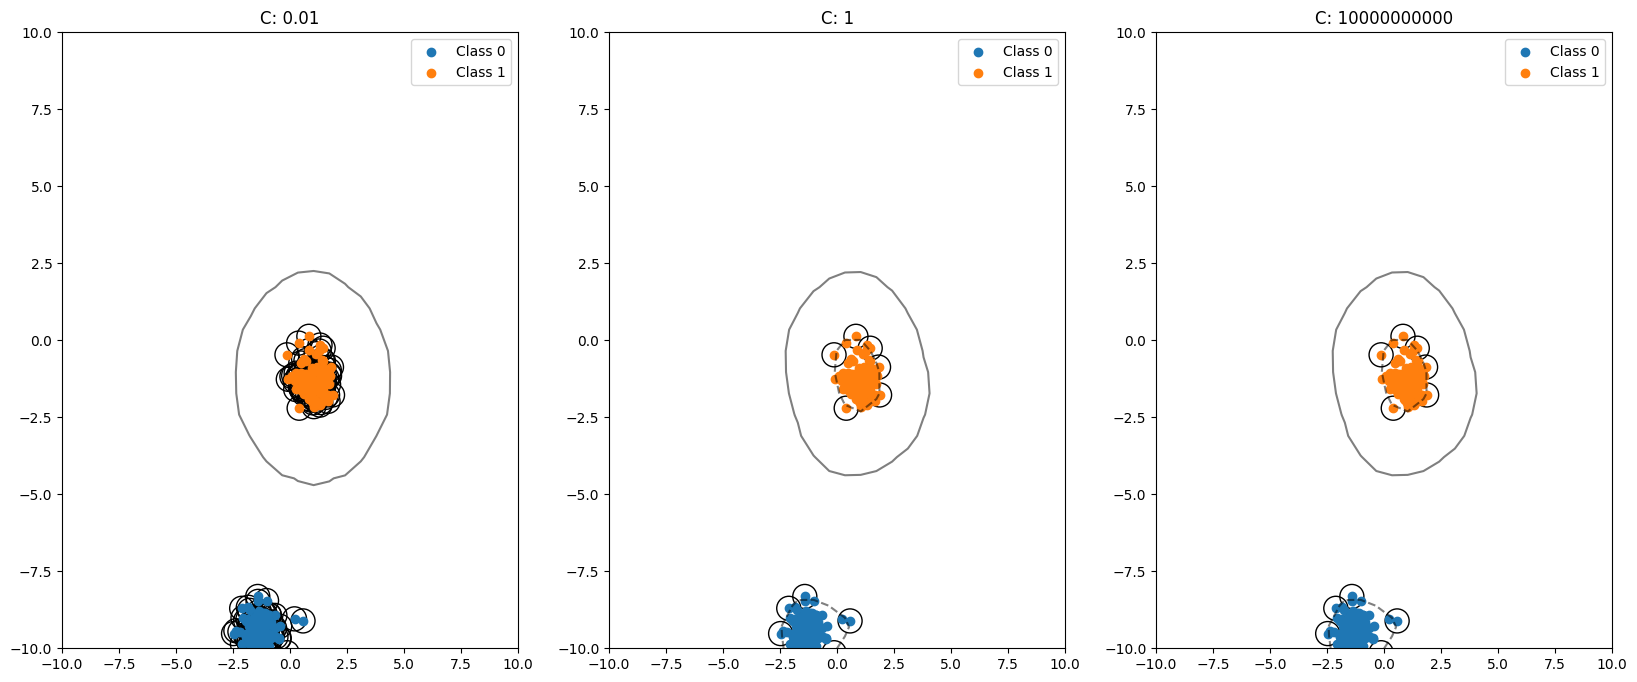

In [5]:
C = [-2,0,10]
counter = 0
plt.rcParams["figure.figsize"] = (20,8)
for c in C:
    counter = counter + 1
    model = svm.SVC(kernel = 'rbf', gamma = 'auto', C = pow(10, c))
    model.fit(X, y)
    plt.subplot(1, len(C),counter)
    plot_svc_decision_function(X, y, model,xlim = [-10,10],ylim=[-10,10])
    plt.title("C: " + str(pow(10,c)))
plt.rcParams.update(plt.rcParamsDefault)

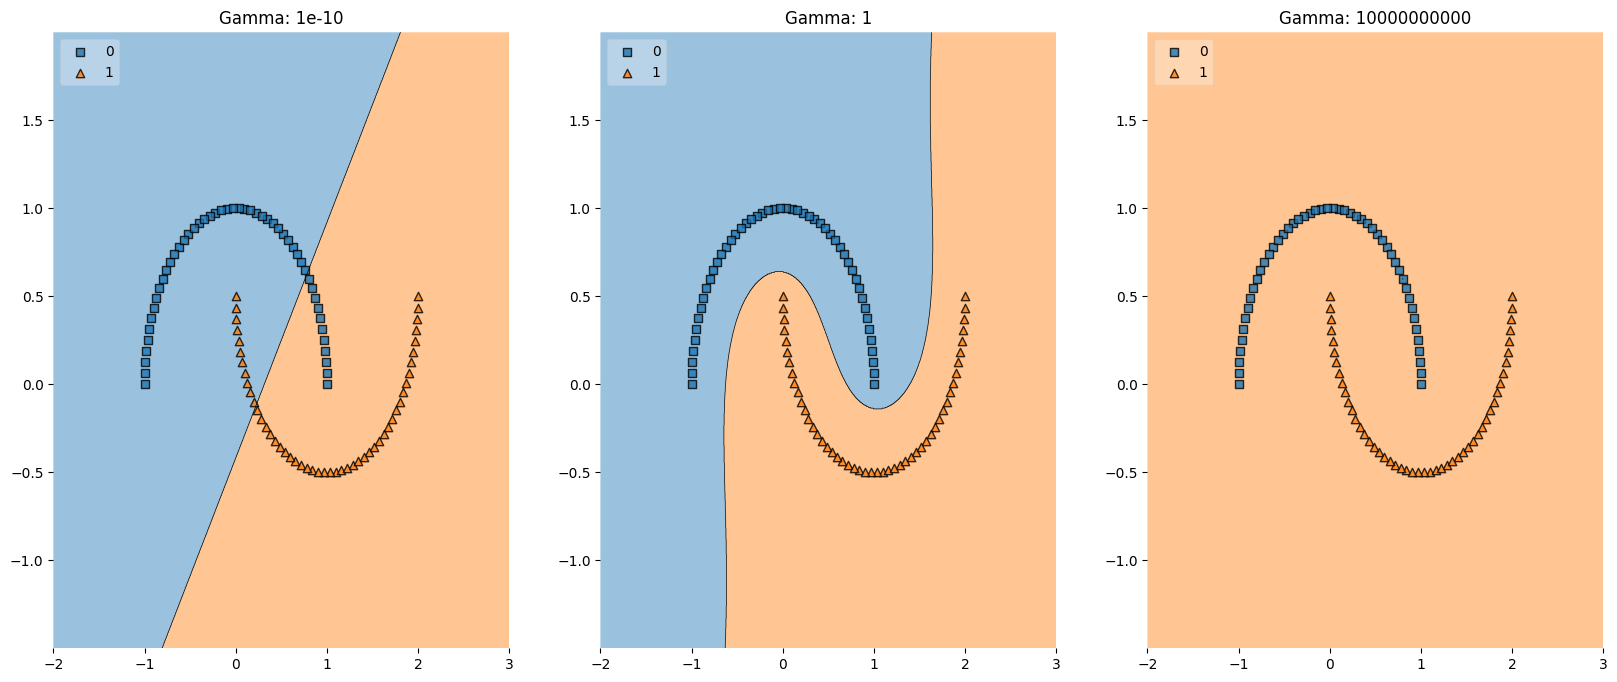

In [12]:
#Let's try on another data set.
X, y = datasets.make_moons(n_samples=100, random_state=123)

#Create RBF SVM model as what we have done in exercise 1, however, use gamme= [10^-2, 10^0, 10^2]
gammas = [-10,0,10]
counter = 0
plt.rcParams["figure.figsize"] = (20,8)
for gamma in gammas:
    counter = counter + 1
    model = svm.SVC(kernel = 'rbf', gamma=pow(10,gamma))
    model.fit(X, y)
    plt.subplot(1, len(gammas),counter)
    fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
    plt.title("Gamma: " + str(pow(10,gamma)))
plt.rcParams.update(plt.rcParamsDefault)

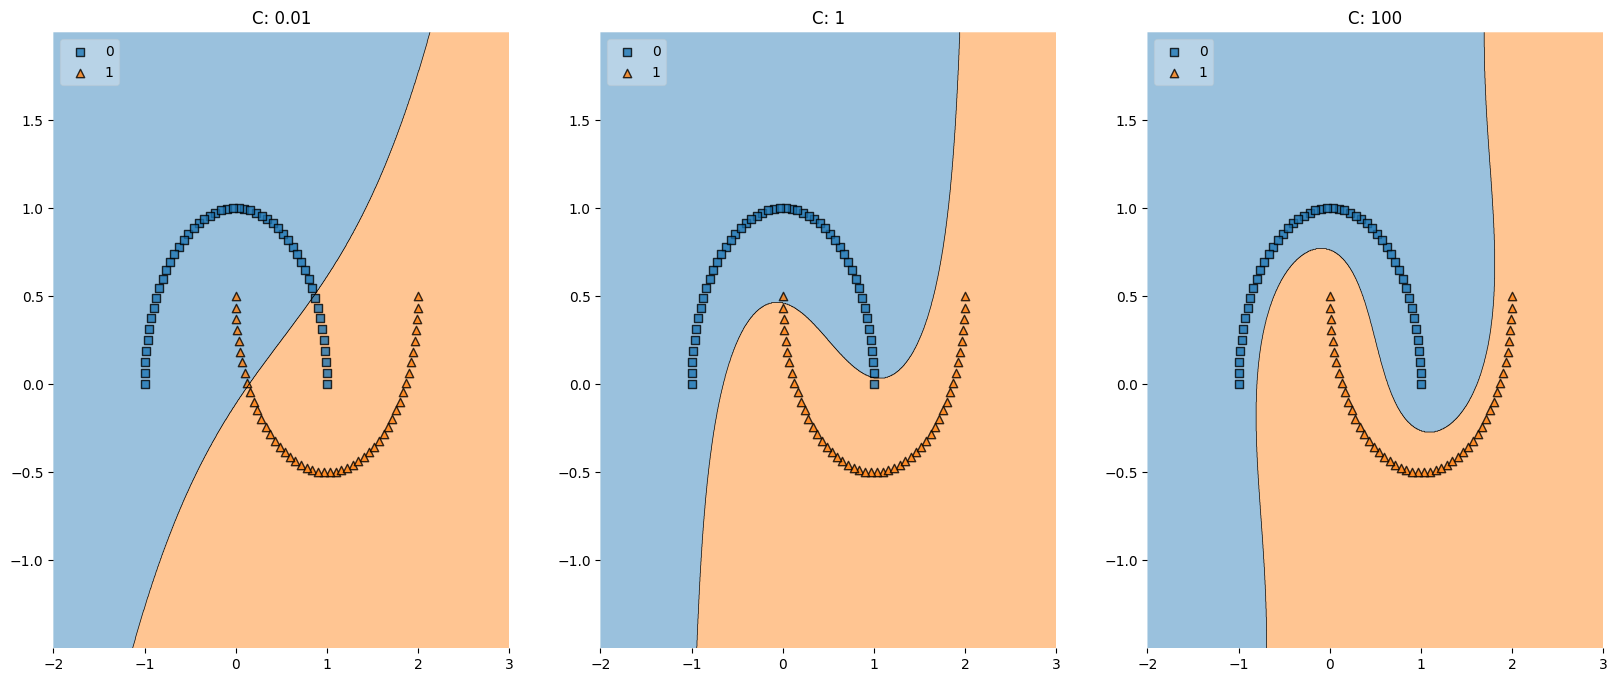

In [7]:
C = [-2,0,2]
counter = 0
plt.rcParams["figure.figsize"] = (20,8)
for c in C:
    counter = counter + 1
    model = svm.SVC(kernel = 'rbf', gamma = 'auto', C = pow(10, c))
    model.fit(X, y)
    plt.subplot(1, len(C),counter)
    fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
    plt.title("C: " + str(pow(10,c)))
plt.rcParams.update(plt.rcParamsDefault)

Q1: What do you think is the effect of different gamma, and C in the data set? How does changing gamma and/or C affect the decision boundary?
Q2: Try changing the code to play with different gamma and C values

Next, we will use a grid search to find the optimum values of gamma and C. 

Note that, in all previous examples, all data points were used to develop the model, however, in practice, we need to split the data into three main chucks i.e. training, validation, and testing sets.

In [16]:
X, y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

In [17]:
# Here we split the data into train and testing set using hold-out technique. 
# We use 80% of the data to train and select the hyper parameters.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Specify the evaluation metric we will use to select our hyper parameters. In this example, we will use auc.
scores = ['accuracy']

In [18]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Grid scores on development set:

1.000 (+/-0.000) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.581 (+/-0.181) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.999 (+/-0.005) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.527 (+/-0.123) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'

/Users/laura/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Q3: Plot the decision boundary using the gamma and C identified from grid search.

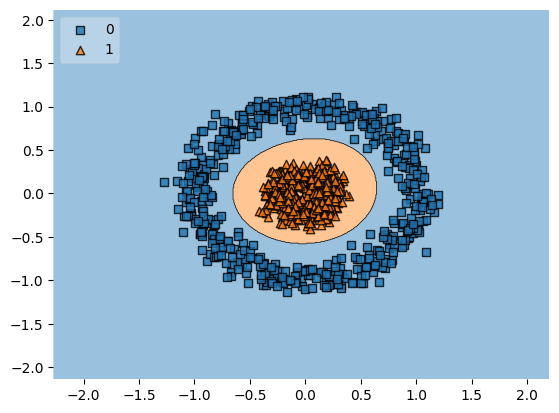

In [21]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 1)
model.fit(X_test, y_test)
plot_decision_regions(X=X, y=y, clf=model, legend=2)